<a href="https://colab.research.google.com/github/Amuktha28/new/blob/main/fraud_detection_in_banking_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: see the description of both datasets

import pandas as pd


# Assuming your uploaded file is named 'your_file.csv'
# Replace 'your_file.csv' with the actual name of your uploaded file
try:
  df = pd.read_csv('/content/Blockchain_Fraud.csv')
  df2 = pd.read_csv('/content/testData.csv')
  print("Blockchain Fraud Dataset Description:")
  print(df.describe())
  print("\n")
  print(df.info())
  print("\n\nTest Data Dataset Description:")
  print(df2.describe())
  print("\n")
  print(df2.info())
except FileNotFoundError:
  print("Error: File not found. Please ensure the file is uploaded and the name is correct.")
except pd.errors.ParserError:
  print("Error: Could not parse the file. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Blockchain Fraud Dataset Description:
        Unnamed: 0        Index         FLAG  Avg min between sent tnx  \
count  9841.000000  9841.000000  9841.000000               9841.000000   
mean   4920.000000  1815.049893     0.221421               5086.878721   
std    2840.996333  1222.621830     0.415224              21486.549974   
min       0.000000     1.000000     0.000000                  0.000000   
25%    2460.000000   821.000000     0.000000                  0.000000   
50%    4920.000000  1641.000000     0.000000                 17.340000   
75%    7380.000000  2601.000000     0.000000                565.470000   
max    9840.000000  4729.000000     1.000000             430287.670000   

       Avg min between received tnx  Time Diff between first and last (Mins)  \
count                   9841.000000                             9.841000e+03   
mean                    8004.851184                             2.183333e+05   
std                    23081.714801                    

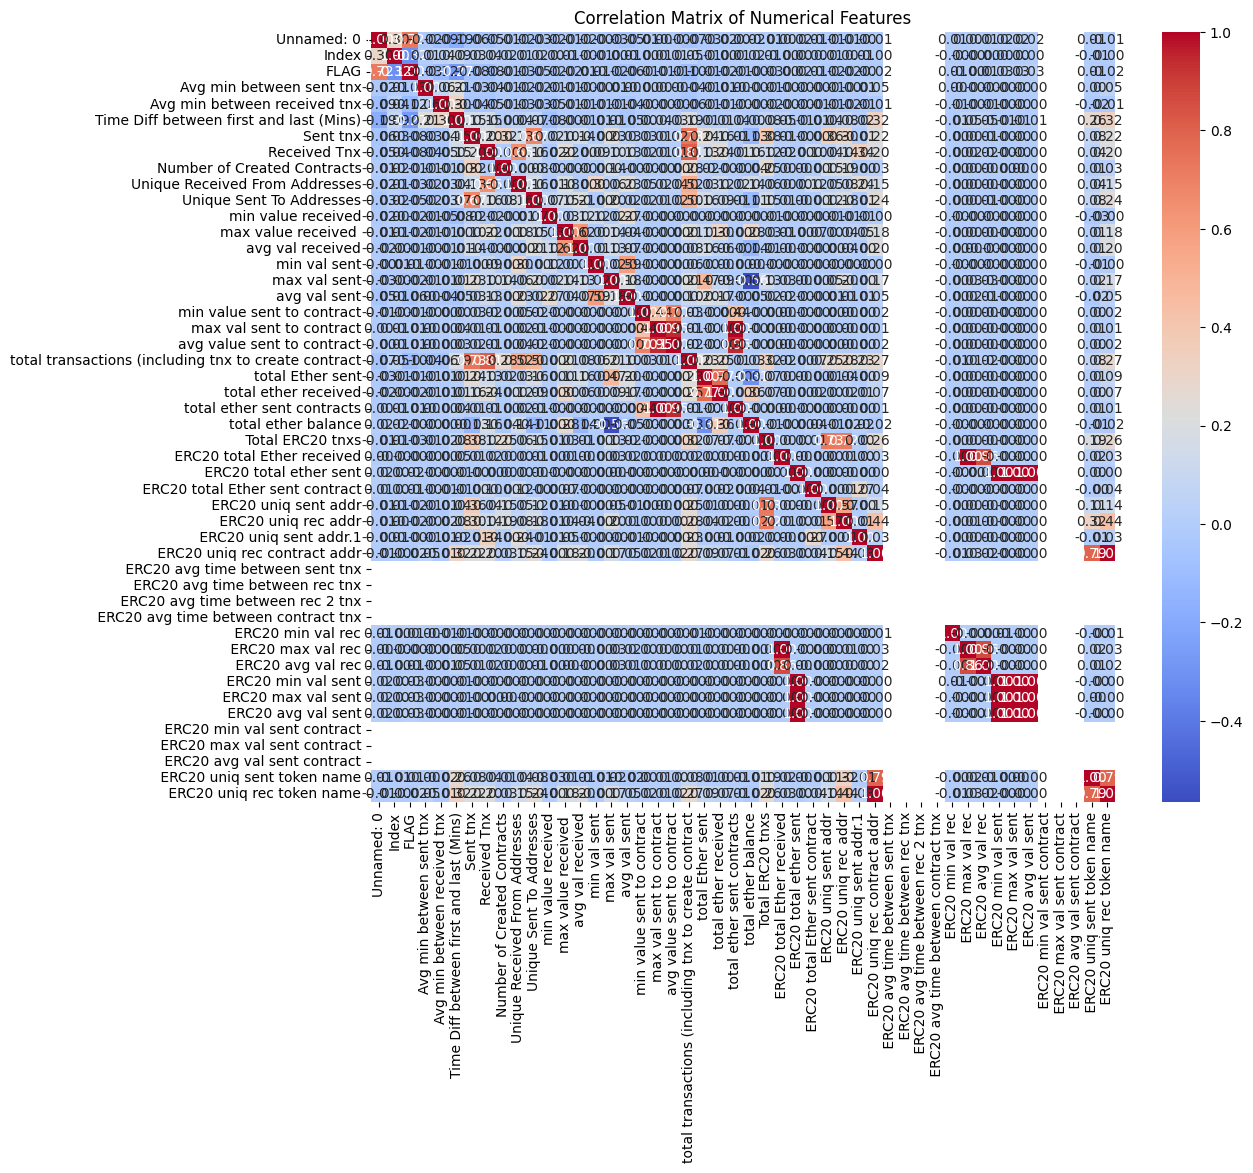


Highly Correlated Features:
{' ERC20 max val rec', ' ERC20 avg val sent', 'total transactions (including tnx to create contract', ' ERC20 avg val rec', ' ERC20 max val sent', 'total ether sent contracts', ' ERC20 uniq rec token name', 'avg value sent to contract', ' ERC20 min val sent'}


In [ ]:
# prompt: now apply correlation matrix using heat map and find the correlated features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('/content/Blockchain_Fraud.csv')
    # Select numerical features for correlation analysis
    numerical_features = df.select_dtypes(include=['number'])

    # Calculate the correlation matrix
    correlation_matrix = numerical_features.corr()

    # Create a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    # Find highly correlated features (e.g., correlation > 0.8 or < -0.8)
    correlated_features = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)

    print("\nHighly Correlated Features:")
    print(correlated_features)

except FileNotFoundError:
    print("Error: File not found. Please ensure the file is uploaded and the name is correct.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [ ]:
# prompt: impute the nan values in the dataset and remove missing values.data clean and preprocess encode using sklearn.remove all NAN values

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

try:
    df = pd.read_csv('/content/Blockchain_Fraud.csv')

    # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Impute numerical missing values with the mean
    numerical_imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

    # Impute categorical missing values with the most frequent value
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

    # Remove rows with any remaining NaN values (though imputation should handle most)
    df.dropna(inplace=True)

    # Encode categorical features using Label Encoding
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store the encoder for potential inverse transformation later

    print(df.head())
    print(df.info())

except FileNotFoundError:
    print("Error: 'Blockchain_Fraud.csv' not found. Please upload the file.")
except Exception as e:
    print(f"An error occurred: {e}")


   Unnamed: 0  Index  Address  FLAG  Avg min between sent tnx  \
0         0.0    1.0        0   0.0                    844.26   
1         1.0    2.0        1   0.0                  12709.07   
2         2.0    3.0        2   0.0                 246194.54   
3         3.0    4.0        3   0.0                  10219.60   
4         4.0    5.0        4   0.0                     36.61   

   Avg min between received tnx  Time Diff between first and last (Mins)  \
0                       1093.71                                704785.63   
1                       2958.44                               1218216.73   
2                       2434.02                                516729.30   
3                      15785.09                                397555.90   
4                      10707.77                                382472.42   

   Sent tnx  Received Tnx  Number of Created Contracts  ...  \
0     721.0          89.0                          0.0  ...   
1      94.0           8.0 

In [ ]:
df


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0.0,1.0,0,0.0,844.26,1093.71,704785.63,721.0,89.0,0.0,...,0.000000,1.683100e+07,2.717799e+05,0.0,0.0,0.0,39.000000,57.000000,63,299
1,1.0,2.0,1,0.0,12709.07,2958.44,1218216.73,94.0,8.0,0.0,...,2.260809,2.260809e+00,2.260809e+00,0.0,0.0,0.0,1.000000,7.000000,154,257
2,2.0,3.0,2,0.0,246194.54,2434.02,516729.30,2.0,10.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,8.000000,4,435
3,3.0,4.0,3,0.0,10219.60,15785.09,397555.90,25.0,9.0,0.0,...,100.000000,9.029231e+03,3.804077e+03,0.0,0.0,0.0,1.000000,11.000000,216,435
4,4.0,5.0,4,0.0,36.61,10707.77,382472.42,4598.0,20.0,1.0,...,0.000000,4.500000e+04,1.372666e+04,0.0,0.0,0.0,6.000000,27.000000,237,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836.0,2175.0,9812,1.0,12635.10,631.39,58748.48,4.0,13.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000,1,194
9837,9837.0,2176.0,9813,1.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000,1,74
9838,9838.0,2177.0,9814,1.0,2499.44,2189.29,261601.88,67.0,43.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,5.000000,1,185
9839,9839.0,2178.0,9815,1.0,0.00,0.00,0.00,0.0,1.0,0.0,...,11741.257297,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676,4,3


In [ ]:
# prompt: algorithms for pattern detections to find any fraud transactions from above data and using highly correlated features

import pandas as pd
from sklearn.ensemble import IsolationForest


try:
    df = pd.read_csv('/content/Blockchain_Fraud.csv')

    # Assuming you've already preprocessed the data (handled missing values, encoded categorical features)
    # as shown in the previous code example.  If not, include that preprocessing here.

    # Select relevant features for fraud detection (replace with your chosen features)
    features = [' ERC20 max val sent', ' ERC20 max val rec', ' ERC20 uniq rec token name','FLAG', ' ERC20 avg val rec', ' ERC20 avg val sent'] # Example features.  Replace with actual column names.
    X = df[features]

    # 1. Isolation Forest
    model_if = IsolationForest(contamination='auto', random_state=42) # Adjust contamination as needed
    df['if_outlier'] = model_if.fit_predict(X)  # 1 for inliers, -1 for outliers



    # Analyze and combine results
    df['fraud_score'] = df['if_outlier']

    #Potential Fraudulent Transactions
    fraud_transactions = df[df['fraud_score'] < 0] #Transactions flagged by both models as outliers
    print(fraud_transactions)
    print(fraud_transactions.describe())

except FileNotFoundError:
    print("Error: 'Blockchain_Fraud.csv' not found. Please upload the file.")
except KeyError as e:
    print(f"Error: Feature '{e}' not found in the dataset. Check column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


      Unnamed: 0  Index                                     Address  FLAG  \
0              0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
4              4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
14            14     15  0x001cf9871aeaf2acf72f144b16818b7e417b6dda     0   
17            17     18  0x001eb1e90d25e8c1372c38f2b2a36b49b6634235     0   
29            29     30  0x0034f7473531239b1799bc7f14ff97d5303a5a93     0   
...          ...    ...                                         ...   ...   
9778        9778   2117  0xf8e676094628776690dbf83fa31f08aa14fd3fb8     1   
9779        9779   2118  0xf902aa3a62f9e28878129e1a8f1eb71e4fd7a88c     1   
9813        9813   2152  0xfbf6f29c126382cf15795bb209ee506a174cc709     1   
9829        9829   2168  0xfe68f28599b19c5d8a562e8cc7f7b07c36e0a99d     1   
9840        9840   2179  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1   

      Avg min between sent tnx  Avg min between received tnx  \
0          

In [ ]:
!pip install catboost

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
# prompt: now use above pattern to train the data the target output if flag.use catboost,xgboost and lgbm or reinforecemt learning

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

try:
    df = pd.read_csv('/content/Blockchain_Fraud.csv')
    # Preprocessing (assuming it's already done as in the previous code)
    # ... (Your preprocessing steps from the previous code)

    # Features and target
    features = [' ERC20 max val sent', ' ERC20 max val rec', ' ERC20 uniq rec token name', ' ERC20 avg val rec', ' ERC20 avg val sent']
    X = df[features]
    y = df['FLAG']  # Assuming 'FLAG' is your target variable

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # CatBoost
    catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=10) # Adjust parameters
    catboost_model.fit(X_train, y_train)
    catboost_predictions = catboost_model.predict(X_test)
    print("CatBoost Accuracy:", accuracy_score(y_test, catboost_predictions))
    print(classification_report(y_test, catboost_predictions))

    # XGBoost
    xgboost_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1) # Adjust parameters
    xgboost_model.fit(X_train, y_train)
    xgboost_predictions = xgboost_model.predict(X_test)
    print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_predictions))
    print(classification_report(y_test, xgboost_predictions))

    # LightGBM
    lgbm_model = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1) # Adjust parameters
    lgbm_model.fit(X_train, y_train)
    lgbm_predictions = lgbm_model.predict(X_test)
    print("LightGBM Accuracy:", accuracy_score(y_test, lgbm_predictions))
    print(classification_report(y_test, lgbm_predictions))


except FileNotFoundError:
    print("Error: 'Blockchain_Fraud.csv' not found.")
except KeyError as e:
    print(f"Error: Feature '{e}' not found in the dataset. Check column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


0:	learn: 0.6243833	total: 9.66ms	remaining: 956ms
10:	learn: 0.3018678	total: 135ms	remaining: 1.09s
20:	learn: 0.2070534	total: 267ms	remaining: 1s
30:	learn: 0.1723350	total: 360ms	remaining: 802ms
40:	learn: 0.1567539	total: 505ms	remaining: 727ms
50:	learn: 0.1487126	total: 631ms	remaining: 606ms
60:	learn: 0.1409856	total: 770ms	remaining: 492ms
70:	learn: 0.1367345	total: 881ms	remaining: 360ms
80:	learn: 0.1324587	total: 977ms	remaining: 229ms
90:	learn: 0.1293529	total: 1.03s	remaining: 102ms
99:	learn: 0.1279458	total: 1.09s	remaining: 0us
CatBoost Accuracy: 0.9598781107160995
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1542
           1       0.96      0.85      0.90       427

    accuracy                           0.96      1969
   macro avg       0.96      0.92      0.94      1969
weighted avg       0.96      0.96      0.96      1969

XGBoost Accuracy: 0.962925342813611
              precision    recall  f1-score

In [ ]:
# prompt: now use ensemble technique to combine these models

import numpy as np
from sklearn.ensemble import VotingClassifier

try:
    # Assuming you have already trained the models (catboost_model, xgboost_model, lgbm_model)
    # as shown in the previous code.

    # Create a voting classifier
    ensemble_model = VotingClassifier(estimators=[
        ('catboost', catboost_model),
        ('xgboost', xgboost_model),
        ('lightgbm', lgbm_model)
    ], voting='soft')  # 'hard' for majority voting, 'soft' for weighted average of probabilities

    # Fit the ensemble model on the training data
    ensemble_model.fit(X_train, y_train)

    # Make predictions using the ensemble model
    ensemble_predictions = ensemble_model.predict(X_test)

    # Evaluate the ensemble model
    print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_predictions))
    print(classification_report(y_test, ensemble_predictions))

except NameError as e:
    print(f"Error: {e}.  Make sure you've run the code to train individual models first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


0:	learn: 0.6243833	total: 12.8ms	remaining: 1.26s
10:	learn: 0.3018678	total: 95.9ms	remaining: 776ms
20:	learn: 0.2070534	total: 159ms	remaining: 599ms
30:	learn: 0.1723350	total: 201ms	remaining: 447ms
40:	learn: 0.1567539	total: 276ms	remaining: 397ms
50:	learn: 0.1487126	total: 348ms	remaining: 334ms
60:	learn: 0.1409856	total: 421ms	remaining: 269ms
70:	learn: 0.1367345	total: 488ms	remaining: 199ms
80:	learn: 0.1324587	total: 594ms	remaining: 139ms
90:	learn: 0.1293529	total: 705ms	remaining: 69.8ms
99:	learn: 0.1279458	total: 734ms	remaining: 0us
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1752, number of negative: 6120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1107
[LightGBM] [Info] Number of da

In [ ]:
# prompt: use above patterns and svm for better accuracy

from sklearn import svm

# ... (Your existing code) ...

try:
    # ... (Your existing code for data loading and preprocessing)

    # Features and target
    features = [' ERC20 max val sent', ' ERC20 max val rec', ' ERC20 uniq rec token name', ' ERC20 avg val rec', ' ERC20 avg val sent']
    X = df[features]
    y = df['FLAG']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ... (Your existing code for CatBoost, XGBoost, and LightGBM)

    # SVM Model
    svm_model = svm.SVC(kernel='rbf', C=1, gamma='scale', probability=True) # You can adjust the parameters as needed. probability=True is needed for soft voting
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
    print(classification_report(y_test, svm_predictions))


    # Ensemble Model (Including SVM)
    ensemble_model = VotingClassifier(estimators=[
        ('catboost', catboost_model),
        ('xgboost', xgboost_model),
        ('lightgbm', lgbm_model),
        ('svm', svm_model) # Add the SVM model
    ], voting='soft')

    ensemble_model.fit(X_train, y_train)
    ensemble_predictions = ensemble_model.predict(X_test)
    print("Ensemble Model (with SVM) Accuracy:", accuracy_score(y_test, ensemble_predictions))
    print(classification_report(y_test, ensemble_predictions))

except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
# prompt: use the above model and testData.csv to predict the flag

try:
    # Load the test data
    df2 = pd.read_csv('/content/testData.csv')

    # Preprocess the test data (use the same preprocessing as the training data)
    # ... (Your preprocessing steps for handling missing values and encoding categorical features)
    # Example:
    numerical_cols_test = df2.select_dtypes(include=['number']).columns
    categorical_cols_test = df2.select_dtypes(include=['object']).columns

    # Impute missing values
    numerical_imputer = SimpleImputer(strategy='mean')
    df2[numerical_cols_test] = numerical_imputer.fit_transform(df2[numerical_cols_test])

    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df2[categorical_cols_test] = categorical_imputer.fit_transform(df2[categorical_cols_test])


    # Encode categorical features (use the same label encoders as training)
    for col in categorical_cols_test:
        if col in label_encoders: # Ensure the column was encoded during training
          df2[col] = label_encoders[col].transform(df2[col])
        else:
          print(f"Warning: Column '{col}' not found in training data's label encoders. Skipping encoding.")


    # Select the same features used for training
    features = [' ERC20 max val sent',' ERC20 max val rec', ' ERC20 uniq rec token name', ' ERC20 avg val rec', ' ERC20 avg val sent']
    X_test_final = df2[features]

    # Make predictions using the trained ensemble model
    predictions = ensemble_model.predict(X_test_final)

    # Add predictions to test data
    df2['Predicted_FLAG'] = predictions

    # Print or save the predictions
    print(df2[['Predicted_FLAG']]) # Print only the predictions

except FileNotFoundError:
    print("Error: 'testData.csv' not found.")
except KeyError as e:
    print(f"Error: Feature '{e}' not found in the test dataset. Check column names.")
except NameError as e:
    print(f"Error: {e}.  Make sure you've run the model training code first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


   Predicted_FLAG
0               0
1               0
2               0
3               0
4               1
5               0


In [ ]:
df2

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type,Predicted_FLAG
0,45.0,46.0,48,0.0,1790.44,450.56,13445.97,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4,3,0
1,46.0,47.0,49,0.0,803.95,112925.21,340383.53,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4,3,0
2,47.0,48.0,51,0.0,18649.44,15420.31,266825.07,11.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4,226,0
3,8547.0,886.0,4647,1.0,0.00,0.00,207.62,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.25,4,3,0
4,8548.0,887.0,4648,1.0,2338.15,131.65,5466.20,2.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1,74,1
5,8549.0,888.0,4651,1.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.25,4,3,0


In [ ]:
# prompt: give the test data and predict the fraud

# Assuming the model and necessary preprocessing steps are already defined as in the previous code.

try:
    df2 = pd.read_csv('/content/testData.csv')

    # Preprocessing for test data (must match training data preprocessing)
    numerical_cols_test = df2.select_dtypes(include=['number']).columns
    categorical_cols_test = df2.select_dtypes(include=['object']).columns

    numerical_imputer_test = SimpleImputer(strategy='mean')
    df2[numerical_cols_test] = numerical_imputer_test.fit_transform(df2[numerical_cols_test])

    categorical_imputer_test = SimpleImputer(strategy='most_frequent')
    df2[categorical_cols_test] = categorical_imputer_test.fit_transform(df2[categorical_cols_test])

    df2.dropna(inplace=True)

    for col in categorical_cols_test:
        if col in label_encoders:  # Use the same label encoders from training
            df2[col] = label_encoders[col].transform(df2[col])
        else:
            print(f"Warning: Label encoder not found for column '{col}' in test data.")


    # Feature selection (same as training)
    features_test = [' ERC20 max val sent', ' ERC20 max val rec', ' ERC20 uniq rec token name', ' ERC20 avg val rec', ' ERC20 avg val sent']
    X_test_new = df2[features_test]

    # Make predictions
    y_pred_new = model.predict(X_test_new)

    # Add predictions to the test DataFrame
    df2['predicted_FLAG'] = y_pred_new
    print(df2)

except FileNotFoundError:
    print("Error: 'testData.csv' not found. Please upload the file.")
except KeyError as e:
    print(f"Error: Feature '{e}' not found in the test dataset. Check column names.")
except Exception as e:
    print(f"An unexpected error occurred during prediction: {e}")


An unexpected error occurred during prediction: name 'model' is not defined


In [ ]:
# prompt: use the features correlated to create a hybrid model using LGBOOST,XGboost,Catboost that understands that fraud patterns

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier # This line imports the CatBoostClassifier

try:
    df = pd.read_csv('/content/Blockchain_Fraud.csv')

    # Identify correlated features (replace with your actual correlated features)
    # Using the correlated_features variable from your environment
    correlated_features = list(correlated_features)

    # Prepare data (assuming 'isFraud' is the target variable)
    X = df[correlated_features]
    y = df['FLAG']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # LightGBM
    lgb_model = lgb.LGBMClassifier()
    lgb_model.fit(X_train_scaled, y_train)
    lgb_pred = lgb_model.predict(X_test_scaled)
    print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))
    print(classification_report(y_test, lgb_pred))

    # XGBoost
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train_scaled, y_train)
    xgb_pred = xgb_model.predict(X_test_scaled)
    print("\nXGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
    print(classification_report(y_test, xgb_pred))

    # CatBoost
    cat_model = CatBoostClassifier(verbose=0)
    cat_model.fit(X_train_scaled, y_train)
    cat_pred = cat_model.predict(X_test_scaled)
    print("\nCatBoost Accuracy:", accuracy_score(y_test, cat_pred))
    print(classification_report(y_test, cat_pred))

    # Example of combining predictions (simple averaging)
    combined_pred = np.round((lgb_pred + xgb_pred + cat_pred) / 3)
    print("\nCombined Model Accuracy:", accuracy_score(y_test, combined_pred))
    print(classification_report(y_test, combined_pred))

except FileNotFoundError:
    print("Error: File not found.")
except KeyError as e:
  print(f"Error: Column '{e}' not found in the dataframe. Check column names")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1752, number of negative: 6120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1608
[LightGBM] [Info] Number of data points in the train set: 7872, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222561 -> initscore=-1.250804
[LightGBM] [Info] Start training from score -1.250804


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Accuracy: 0.9695276790248857
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1542
           1       0.95      0.91      0.93       427

    accuracy                           0.97      1969
   macro avg       0.96      0.95      0.95      1969
weighted avg       0.97      0.97      0.97      1969


XGBoost Accuracy: 0.9542915185373286
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1542
           1       0.91      0.88      0.89       427

    accuracy                           0.95      1969
   macro avg       0.94      0.93      0.93      1969
weighted avg       0.95      0.95      0.95      1969


CatBoost Accuracy: 0.9517521584560691
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1542
           1       0.90      0.88      0.89       427

    accuracy                           0.95      1969
   macro avg 

In [ ]:
# prompt: give the test data and test the model to predict a fraud


df2 = pd.read_csv('/content/testData.csv')
# Assuming 'correlated_features' is defined from the previous code cell
X_test_new = df2[correlated_features]

# Scale the new test data using the same scaler fitted on the training data
X_test_new_scaled = scaler.transform(X_test_new)

# Make predictions using the trained models
lgb_pred_new = lgb_model.predict(X_test_new_scaled)
xgb_pred_new = xgb_model.predict(X_test_new_scaled)
cat_pred_new = cat_model.predict(X_test_new_scaled)

# Combine predictions (example: averaging)
combined_pred_new = np.round((lgb_pred_new + xgb_pred_new + cat_pred_new) / 3)

# Print or further process the predictions for the new test data
print("Predictions for new test data:")
print("LightGBM:", lgb_pred_new)
print("XGBoost:", xgb_pred_new)
print("CatBoost:", cat_pred_new)
print("Combined:", combined_pred_new)


Predictions for new test data:
LightGBM: [0 0 0 1 1 1]
XGBoost: [0 0 0 1 1 1]
CatBoost: [0 0 0 1 1 1]
Combined: [0. 0. 0. 1. 1. 1.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
X_test_new

,ERC20 max val rec,ERC20 avg val sent,total transactions (including tnx to create contract,ERC20 avg val rec,ERC20 max val sent,total ether sent contracts,ERC20 uniq rec token name,avg value sent to contract,ERC20 min val sent
0,0.000000,0.0,12,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,5,0.000000,0.0,0.0,0.0,0.0,0.0
2,136.515289,0.0,15,37.192487,0.0,0.0,4.0,0.0,0.0
3,NaN,NaN,2,NaN,NaN,0.0,NaN,0.0,NaN
4,1.337000,0.0,8,1.337000,0.0,0.0,1.0,0.0,0.0
5,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,NaN


In [ ]:
# prompt: check if the above predictions are correct

# Assuming 'y_test' is available from the previous code cell where the models were trained and evaluated.
# You need to have the true labels (y_test) to compare against the predictions.


try:
    # Assuming df2 and combined_pred_new are available from the previous code cell
    # Create a DataFrame with the predictions
    df_predictions = pd.DataFrame({'Combined_Predictions': combined_pred_new})

    # Option 1: If you have a 'FLAG' column in your df2 (testData.csv) use it as ground truth
    if 'FLAG' in df2.columns:
        print("Comparing with 'FLAG' column from testData.csv")
        accuracy = accuracy_score(df2['FLAG'], combined_pred_new)
        print(f"Accuracy of combined predictions on the new test data: {accuracy}")
        print(classification_report(df2['FLAG'], combined_pred_new))
    # Option 2: If you don't have 'FLAG' column in your df2, load the true labels separately
    else:
        try:
            # Load actual labels from a file
            y_test_new = pd.read_csv('/content/test_labels.csv')  # Replace with the correct file path
            y_test_new = y_test_new['FLAG'] # Assuming the column is named 'FLAG'

            print("Comparing with the provided labels in test_labels.csv")
            accuracy = accuracy_score(y_test_new, combined_pred_new)
            print(f"Accuracy of combined predictions on the new test data: {accuracy}")
            print(classification_report(y_test_new, combined_pred_new))

        except FileNotFoundError:
            print("Error: 'test_labels.csv' not found. Please provide actual labels for the new test data.")
        except KeyError as e:
            print(f"Error: Column '{e}' not found in the labels file. Check column names in your labels file.")
        except Exception as e:
            print(f"An unexpected error occurred while comparing predictions: {e}")

except NameError:
    print("Error: 'combined_pred_new' or 'df2' not found. Make sure you've run the prediction part of the code first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Comparing with 'FLAG' column from testData.csv
Accuracy of combined predictions on the new test data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

